In [4]:
import numpy as np
import tensorflow as tf
import random

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os




In [5]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

window_width = [100,200,300, 400]
#window_width = [350, 400, 450, 500]

for window_input_width in window_width:
    
#     SEED = 1
#     random.seed(SEED)
#     np.random.seed(SEED)
#     tf.random.set_seed(SEED)
    
    linear_model, lstm_model, dnn_model,  df_all_chan,  input_columns  = d2d.import_data(filename = file)

    da = df_all_chan.to_numpy()

    window_input_width = window_input_width

    multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
        input_width=window_input_width, label_width=1, shift=0,
        label_columns=['Discharge'],
        input_columns=input_columns,
        shuffle=True)

    history['lstm_'+str(window_input_width)+'_'+filt] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)
    #history['conv_'+str(width)] = d2d.compile_and_fit(conv_model, multi_step_window_shuffled, learning_rate = 0.001)

    val_performance['lstm_'+str(window_input_width)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.val)
    performance['lstm_'+str(window_input_width)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>


/home/jmanos/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Epoch 1/100
28/28 [==============================] - 2s 46ms/step - loss: 2.6577 - mean_absolute_error: 1.2064 - val_loss: 1.4004 - val_mean_absolute_error: 0.8676
Epoch 2/100
28/28 [==============================] - 1s 38ms/step - loss: 1.1184 - mean_absolute_error: 0.7723 - val_loss: 1.0180 - val_mean_absolute_error: 0.7250
Epoch 3/100
28/28 [==============================] - 1s 38ms/step - loss: 0.8574 - mean_absolute_error: 0.6656 - val_loss: 0.8332 - val_mean_absolute_error: 0.6287
Epoch 4/100
28/28 [==============================] - 1s 37ms/step - loss: 0.7513 - mean_absolute_error: 0.5890 - val_loss: 0.7553 - val_mean_absolute_error: 0.6074
Epoch 5/100
28/28 [==============================] - 1s 38ms/step - loss: 0.6459 - mean_absolute_error: 0.5452 - val_loss: 0.6142 - val_mean_absolute_error: 0.5607
Epoch 6/100
28/28 [==============================] - 1s 38ms/step - loss: 0.5353 - mean_absolute_error: 0.4806 - val_loss: 0.6361 - val_mean_absolute_error: 0.5618
Epoch 7/100
28/2

Epoch 27/100
14/14 [==============================] - 1s 72ms/step - loss: 0.1875 - mean_absolute_error: 0.2321 - val_loss: 0.6980 - val_mean_absolute_error: 0.5164
Epoch 28/100
14/14 [==============================] - 1s 72ms/step - loss: 0.1785 - mean_absolute_error: 0.2393 - val_loss: 0.5422 - val_mean_absolute_error: 0.4540
Epoch 29/100
14/14 [==============================] - 1s 72ms/step - loss: 0.1771 - mean_absolute_error: 0.2374 - val_loss: 0.4834 - val_mean_absolute_error: 0.4396
Epoch 30/100
14/14 [==============================] - 1s 73ms/step - loss: 0.1728 - mean_absolute_error: 0.2210 - val_loss: 0.5455 - val_mean_absolute_error: 0.4503
Epoch 31/100
14/14 [==============================] - 1s 72ms/step - loss: 0.1571 - mean_absolute_error: 0.2030 - val_loss: 0.5799 - val_mean_absolute_error: 0.4555
Epoch 32/100
14/14 [==============================] - 1s 71ms/step - loss: 0.1474 - mean_absolute_error: 0.1801 - val_loss: 0.5539 - val_mean_absolute_error: 0.4423
Epoch 33/1

Epoch 77/100
14/14 [==============================] - 1s 72ms/step - loss: 0.0857 - mean_absolute_error: 0.1523 - val_loss: 0.5744 - val_mean_absolute_error: 0.4681
Epoch 78/100
14/14 [==============================] - 1s 71ms/step - loss: 0.0970 - mean_absolute_error: 0.1651 - val_loss: 0.5088 - val_mean_absolute_error: 0.4308
Epoch 79/100
14/14 [==============================] - 1s 70ms/step - loss: 0.0916 - mean_absolute_error: 0.1640 - val_loss: 0.4648 - val_mean_absolute_error: 0.4017
Epoch 80/100
14/14 [==============================] - 1s 72ms/step - loss: 0.0849 - mean_absolute_error: 0.1550 - val_loss: 0.4797 - val_mean_absolute_error: 0.4153
Epoch 81/100
14/14 [==============================] - 1s 72ms/step - loss: 0.0888 - mean_absolute_error: 0.1497 - val_loss: 0.5485 - val_mean_absolute_error: 0.4469
Epoch 82/100
14/14 [==============================] - 1s 73ms/step - loss: 0.1064 - mean_absolute_error: 0.1916 - val_loss: 0.5385 - val_mean_absolute_error: 0.4662
Epoch 83/1

9/9 [==============================] - 1s 120ms/step - loss: 0.1777 - mean_absolute_error: 0.1963 - val_loss: 0.7658 - val_mean_absolute_error: 0.4440
Epoch 42/100
9/9 [==============================] - 1s 120ms/step - loss: 0.1695 - mean_absolute_error: 0.1860 - val_loss: 0.7511 - val_mean_absolute_error: 0.4246
Epoch 43/100
9/9 [==============================] - 1s 122ms/step - loss: 0.1605 - mean_absolute_error: 0.1698 - val_loss: 0.7334 - val_mean_absolute_error: 0.4201
Epoch 44/100
9/9 [==============================] - 1s 117ms/step - loss: 0.1538 - mean_absolute_error: 0.1609 - val_loss: 0.7350 - val_mean_absolute_error: 0.4168
Epoch 45/100
9/9 [==============================] - 1s 119ms/step - loss: 0.1533 - mean_absolute_error: 0.1617 - val_loss: 0.7353 - val_mean_absolute_error: 0.4157
Epoch 46/100
9/9 [==============================] - 1s 119ms/step - loss: 0.1457 - mean_absolute_error: 0.1523 - val_loss: 0.7218 - val_mean_absolute_error: 0.4104
Epoch 47/100
9/9 [===========

9/9 [==============================] - 1s 122ms/step - loss: 0.0657 - mean_absolute_error: 0.1034 - val_loss: 0.4416 - val_mean_absolute_error: 0.3540
Epoch 92/100
9/9 [==============================] - 1s 120ms/step - loss: 0.0768 - mean_absolute_error: 0.1341 - val_loss: 0.3723 - val_mean_absolute_error: 0.3433
Epoch 93/100
9/9 [==============================] - 1s 122ms/step - loss: 0.1057 - mean_absolute_error: 0.2058 - val_loss: 0.4187 - val_mean_absolute_error: 0.3648
Epoch 94/100
9/9 [==============================] - 1s 116ms/step - loss: 0.1025 - mean_absolute_error: 0.1952 - val_loss: 0.4172 - val_mean_absolute_error: 0.3578
Epoch 95/100
9/9 [==============================] - 1s 119ms/step - loss: 0.1029 - mean_absolute_error: 0.1996 - val_loss: 0.3845 - val_mean_absolute_error: 0.3621
Epoch 96/100
9/9 [==============================] - 1s 118ms/step - loss: 0.0861 - mean_absolute_error: 0.1782 - val_loss: 0.4055 - val_mean_absolute_error: 0.3761
Epoch 97/100
9/9 [===========

7/7 [==============================] - 1s 171ms/step - loss: 0.1024 - mean_absolute_error: 0.1539 - val_loss: 0.3996 - val_mean_absolute_error: 0.3467
Epoch 41/100
7/7 [==============================] - 1s 166ms/step - loss: 0.0992 - mean_absolute_error: 0.1553 - val_loss: 0.3814 - val_mean_absolute_error: 0.3405
Epoch 42/100
7/7 [==============================] - 1s 166ms/step - loss: 0.0962 - mean_absolute_error: 0.1569 - val_loss: 0.3836 - val_mean_absolute_error: 0.3419
Epoch 43/100
7/7 [==============================] - 1s 172ms/step - loss: 0.0945 - mean_absolute_error: 0.1549 - val_loss: 0.3854 - val_mean_absolute_error: 0.3400
Epoch 44/100
7/7 [==============================] - 1s 170ms/step - loss: 0.0910 - mean_absolute_error: 0.1496 - val_loss: 0.3735 - val_mean_absolute_error: 0.3394
Epoch 45/100
7/7 [==============================] - 1s 168ms/step - loss: 0.0891 - mean_absolute_error: 0.1418 - val_loss: 0.3641 - val_mean_absolute_error: 0.3204
Epoch 46/100
7/7 [===========

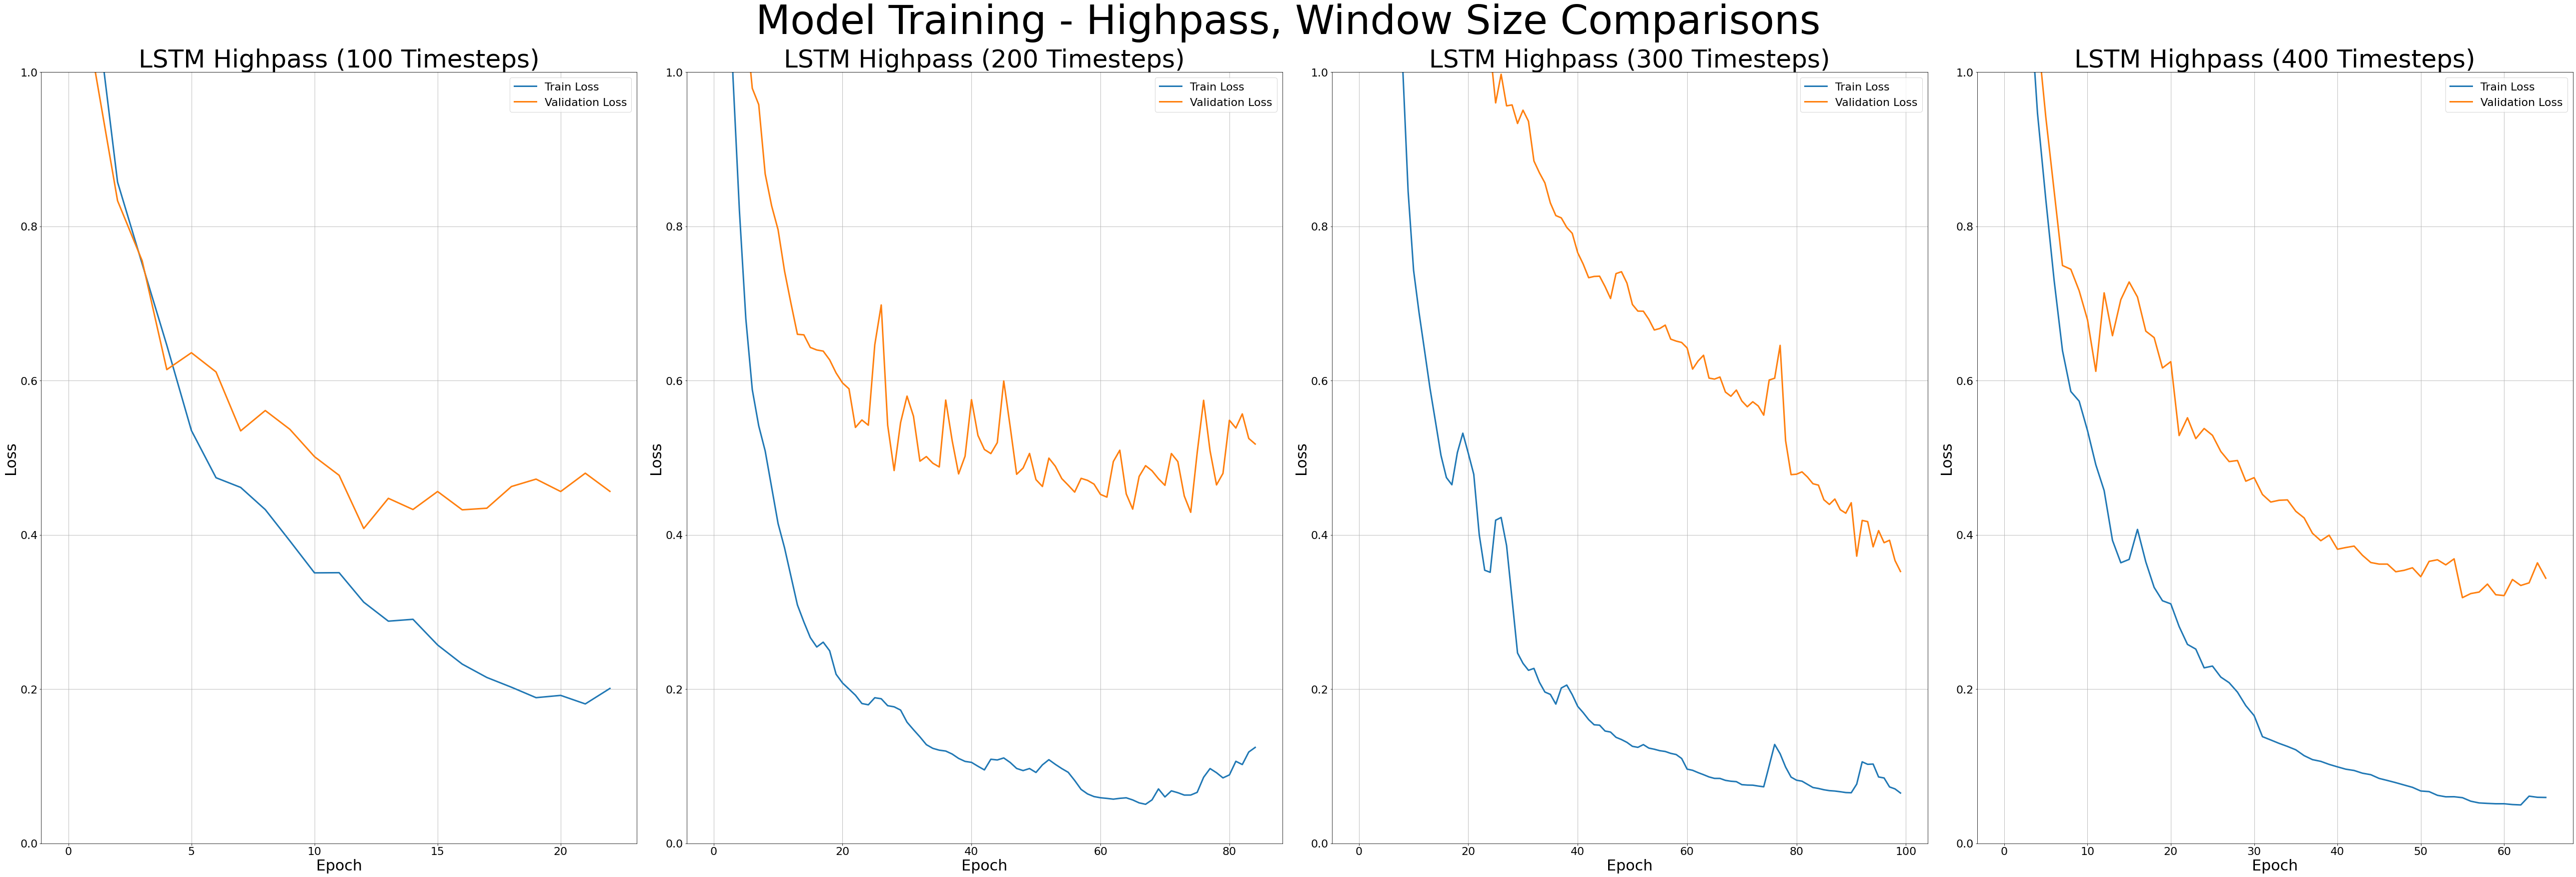

In [6]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

fig, (ax0,ax1,ax2, ax3) = plt.subplots(nrows=1, 
                                 ncols=4, 
                                 sharey=False, 
                                 sharex=False,
                                 figsize=(72,25))
fig.patch.set_facecolor('white')

for ax, hist, title in zip((ax0,ax1,ax2, ax3), 
                           ('lstm_'+str(window_width[0])+'_Highpass','lstm_'+str(window_width[1])+'_Highpass','lstm_'+str(window_width[2])+'_Highpass', 'lstm_'+str(window_width[3])+'_Highpass'),
                            ('LSTM Highpass ('+str(window_width[0])+' Timesteps)','LSTM Highpass ('+str(window_width[1])+' Timesteps)','LSTM Highpass ('+str(window_width[2])+' Timesteps)','LSTM Highpass ('+str(window_width[3])+' Timesteps)' )):
    ax.plot(history[hist].history['loss'], label='Train Loss',linewidth=3)
    ax.plot(history[hist].history['val_loss'], label='Validation Loss',linewidth=3)
    ax.grid(True)
    ax.legend()
    ax.set_title(title,size=50)
    ax.set_ylabel('Loss', size=30)
    ax.set_xlabel('Epoch', size=30)
    ax.set_ylim((0, 1))
    

fig.suptitle('Model Training - Highpass, Window Size Comparisons', fontsize = 80)

plt.tight_layout()
plt.show()